# Prerequisites

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Loading from results folder

In [2]:
df_FS_TH = pd.read_csv('results/Feature_stack_TH.csv')
df_M2_TH = pd.read_csv('results/Multiview-2_TH.csv')
df_M3_TH = pd.read_csv('results/Multiview-3_TH.csv')
df_FS_Global = pd.read_csv('results/Featurestack_global.csv')
df_M2_Global = pd.read_csv('results/Multiview-2_Global.csv')
df_M3_Global = pd.read_csv('results/Multiview-3_Global.csv')
df_NDWI = pd.read_csv('results/NDWI_test.csv')
df_hyperparameter_TH = pd.read_csv('results/hyperparameter_tuning.csv')
df_hyperparameter_Global = \
    pd.read_csv('results/Global_hyperparameter_tuning.csv')

df_trainTH_testTH = pd.read_csv('results/Thai_test_train_TH.csv')
df_trainGlobal_testTH = pd.read_csv('results/Thai_test_train_Global.csv')
df_cloud = pd.read_csv("results/CloudCoverExp.csv")

Summary of experiments

- Relationships between FS, M2, M3
- Visualizing and analysis of local Training
- Visualizing and analysis of Global Training
- Visualizing Hyperparameter Tuning

In [3]:
# Test number to country
# 1 - Thailand
# 2 - Tibet
# 3 - Ghana
# 4 - Brazil
# 5 - Mexico
# 6 - Pakistan
# 7 - Egypt
# 8 - Cambodia
# 9 - India
# 10 - Bangladesh

# precision_table
precision_table_FS_TH = \
    df_FS_TH[["test_1_precision", "test_2_precision",
              "test_3_precision", "test_4_precision",
              "test_5_precision", "test_6_precision",
              "test_7_precision", "test_8_precision",
              "test_9_precision", "test_10_precision"]]

# Recall_table
recall_table_FS_TH = \
    df_FS_TH[["test_1_recall", "test_2_recall",
              "test_3_recall", "test_4_recall",
              "test_5_recall", "test_6_recall",
              "test_7_recall", "test_8_recall",
              "test_9_recall", "test_10_recall"]]

# F1_table
F1_table_FS_TH = \
    df_FS_TH[["test_1_F1", "test_2_F1",
              "test_3_F1", "test_4_F1",
              "test_5_F1", "test_6_F1",
              "test_7_F1", "test_8_F1",
              "test_9_F1", "test_10_F1"]]

df_ev_FS_TH = df_FS_TH[["Name", "precision_ev",
                        "recall_ev", "F1_ev", "accuracy_ev"]]


# F1_table
F1_table_M2_TH = \
    df_M2_TH[["test_1_F1", "test_2_F1",
              "test_3_F1", "test_4_F1",
              "test_5_F1", "test_6_F1",
              "test_7_F1", "test_8_F1",
              "test_9_F1", "test_10_F1"]]

df_ev_M2_TH = df_M2_TH[["Name", "precision_ev",
                        "recall_ev", "F1_ev", "accuracy_ev"]]

F1_table_M3_TH = \
    df_M3_TH[["test_1_F1", "test_2_F1",
              "test_3_F1", "test_4_F1",
              "test_5_F1", "test_6_F1",
              "test_7_F1", "test_8_F1",
              "test_9_F1", "test_10_F1"]]

df_ev_M3_TH = df_M3_TH[["Name", "precision_ev",
                        "recall_ev", "F1_ev", "accuracy_ev"]]

# F1_table
F1_table_FS_Global = \
    df_FS_Global[["test_1_F1", "test_2_F1",
                  "test_3_F1", "test_4_F1",
                  "test_5_F1", "test_6_F1",
                  "test_7_F1", "test_8_F1",
                  "test_9_F1", "test_10_F1"]]

df_ev_FS_Global = df_FS_Global[["Name", "precision_ev",
                                "recall_ev", "F1_ev", "accuracy_ev"]]

# F1_table
F1_table_M2_Global = \
    df_M2_Global[["test_1_F1", "test_2_F1",
                  "test_3_F1", "test_4_F1",
                  "test_5_F1", "test_6_F1",
                  "test_7_F1", "test_8_F1",
                  "test_9_F1", "test_10_F1"]]

df_ev_M2_Global = df_M2_Global[["Name", "precision_ev",
                                "recall_ev", "F1_ev", "accuracy_ev"]]
F1_table_M3_Global = \
    df_M3_Global[["test_1_F1", "test_2_F1",
                  "test_3_F1", "test_4_F1",
                  "test_5_F1", "test_6_F1",
                  "test_7_F1", "test_8_F1",
                  "test_9_F1", "test_10_F1"]]

df_ev_M3_Global = df_M3_Global[["Name", "precision_ev",
                                "recall_ev", "F1_ev", "accuracy_ev"]]
F1_NDWI = df_NDWI[["id", "Name", "F1_0.3", "F1_0.2", "F1_0.1", "F1_0"]]

## Baseline

In [4]:
F1_NDWI

,id,Name,F1_0.3,F1_0.2,F1_0.1,F1_0
0,1,test: 0,0.927697,0.961671,0.983364,0.990963
1,2,test: 1,0.966394,0.961456,0.957776,0.953094
2,3,test: 2,0.499270,0.499270,0.499270,0.519929
3,4,test: 3,0.727515,0.758919,0.797456,0.850543
4,5,test: 4,0.938624,0.952182,0.963141,0.972756
5,6,test: 5,0.725132,0.792941,0.878610,0.914018
6,7,test: 6,0.999752,0.999764,0.999544,0.998961
7,8,test: 7,0.916920,0.938587,0.954697,0.967208
8,9,test: 8,0.955647,0.966590,0.976211,0.984045
9,10,test: 9,0.756519,0.817527,0.849228,0.879614


In [5]:
print("threashold 0 average F1 performance: ", F1_NDWI["F1_0"].sum() / 10)
print("threashold 0.1 average F1 performance: ", F1_NDWI["F1_0.1"].sum() / 10)
print("threashold 0.2 average F1 performance: ", F1_NDWI["F1_0.2"].sum() / 10)
print("threashold 0.3 average F1 performance: ", F1_NDWI["F1_0.3"].sum() / 10)

threashold 0 average F1 performance:  0.90311308243
threashold 0.1 average F1 performance:  0.8859295530499999
threashold 0.2 average F1 performance:  0.86489066889
threashold 0.3 average F1 performance:  0.8413469893999999


## FS - Global Test

In [6]:
df_FS_TH_10 = \
    df_FS_TH[["Name", "test_1_F1", "test_2_F1",
              "test_3_F1", "test_4_F1",
              "test_5_F1", "test_6_F1",
              "test_7_F1", "test_8_F1",
              "test_9_F1", "test_10_F1"]]

df_FS_TH_10["average"] = \
    (df_FS_TH_10["test_1_F1"] + df_FS_TH_10["test_2_F1"] +
     df_FS_TH_10["test_3_F1"] + df_FS_TH_10["test_4_F1"] +
     df_FS_TH_10["test_5_F1"] + df_FS_TH_10["test_6_F1"] +
     df_FS_TH_10["test_7_F1"] + df_FS_TH_10["test_8_F1"] +
     df_FS_TH_10["test_9_F1"] + df_FS_TH_10["test_10_F1"]) / 10

df_FS_TH_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,S1A_el_sl_as,0.965357,0.448320,0.508672,0.821670,0.451982,0.684126,0.827495,0.462297,0.576500,0.098304,0.584472
1,S1A_el,0.969936,0.448308,0.634651,0.657232,0.675115,0.498681,0.751391,0.788713,0.495036,0.673191,0.659225
2,S1A_sl,0.974068,0.719012,0.663786,0.714192,0.945986,0.612640,0.402319,0.964998,0.925860,0.894062,0.781692
3,S1A_as,0.952134,0.953388,0.499341,0.777421,0.897823,0.573669,0.540273,0.916014,0.761137,0.641015,0.751221
4,S1A_sl_as,0.866683,0.634280,0.503108,0.723500,0.784021,0.525912,0.364319,0.864106,0.850951,0.827676,0.694456
5,S1A_el_sl,0.962003,0.448308,0.629559,0.768866,0.605136,0.611296,0.487603,0.822699,0.496738,0.883151,0.671536
6,S1A_el_as,0.966873,0.448308,0.634426,0.714960,0.511988,0.529838,0.541578,0.571455,0.705232,0.392487,0.601714
7,S1_el_sl_as,0.962026,0.448308,0.512340,0.805437,0.467284,0.584833,0.854764,0.501948,0.606040,0.191858,0.593484
8,S1_el,0.972496,0.448308,0.638590,0.715630,0.447223,0.593331,0.469318,0.454437,0.500221,0.126279,0.536583
9,S1_sl,0.970194,0.679721,0.649805,0.841040,0.941326,0.757884,0.488715,0.952067,0.857218,0.884848,0.802282


In [7]:
df_FS_Global_10 = \
    df_FS_Global[["Name", "test_1_F1", "test_2_F1",
                  "test_3_F1", "test_4_F1",
                  "test_5_F1", "test_6_F1",
                  "test_7_F1", "test_8_F1",
                  "test_9_F1", "test_10_F1"]]
df_FS_Global_10["average"] = \
    (df_FS_Global_10["test_1_F1"] + df_FS_Global_10["test_2_F1"] +
     df_FS_Global_10["test_3_F1"] + df_FS_Global_10["test_4_F1"] +
     df_FS_Global_10["test_5_F1"] + df_FS_Global_10["test_6_F1"] +
     df_FS_Global_10["test_7_F1"] + df_FS_Global_10["test_8_F1"] +
     df_FS_Global_10["test_9_F1"] + df_FS_Global_10["test_10_F1"]) / 10

df_FS_Global_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,S1A_el_sl_as,0.860682,0.449780,0.499388,0.794861,0.626063,0.609391,0.703143,0.913846,0.491990,0.627845,0.657699
1,S1A_el,0.471244,0.448308,0.499263,0.721974,0.686950,0.579539,0.495954,0.960608,0.491567,0.857516,0.621292
2,S1A_sl,0.515413,0.522059,0.456413,0.468841,0.467014,0.462394,0.455288,0.492378,0.477036,0.482876,0.479971
3,S1A_as,0.959582,0.917210,0.499270,0.809557,0.913559,0.607547,0.900281,0.921075,0.623366,0.647827,0.779927
4,S1A_sl_as,0.948660,0.955480,0.499340,0.801954,0.901310,0.578421,0.873204,0.915888,0.612742,0.618047,0.770504
5,S1A_el_sl,0.922353,0.448325,0.539243,0.688104,0.685398,0.576817,0.803330,0.956439,0.494687,0.853328,0.696803
6,S1A_el_as,0.923190,0.463429,0.499330,0.798488,0.662224,0.588664,0.875143,0.925349,0.591509,0.701066,0.702839
7,S1_el_sl_as,0.937351,0.452527,0.499267,0.808129,0.640494,0.587482,0.870981,0.917407,0.545196,0.623550,0.688239
8,S1_el,0.471233,0.448308,0.499270,0.788465,0.683777,0.697721,0.494635,0.855259,0.491568,0.916057,0.634629
9,S1_sl,0.962995,0.959329,0.541124,0.847382,0.933577,0.712215,0.851839,0.938644,0.687590,0.698677,0.813337


## M2 - Global Test

In [8]:
df_M2_TH_10 = \
    df_M2_TH[["Name", "test_1_F1", "test_2_F1",
              "test_3_F1", "test_4_F1",
              "test_5_F1", "test_6_F1",
              "test_7_F1", "test_8_F1",
              "test_9_F1", "test_10_F1"]]

df_M2_TH_10["average"] = \
    (df_M2_TH_10["test_1_F1"] + df_M2_TH_10["test_2_F1"] +
     df_M2_TH_10["test_3_F1"] + df_M2_TH_10["test_4_F1"] +
     df_M2_TH_10["test_5_F1"] + df_M2_TH_10["test_6_F1"] +
     df_M2_TH_10["test_7_F1"] + df_M2_TH_10["test_8_F1"] +
     df_M2_TH_10["test_9_F1"] + df_M2_TH_10["test_10_F1"]) / 10

df_M2_TH_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,S1A+(el_sl_as),0.973690,0.448488,0.641033,0.820903,0.926260,0.657317,0.619200,0.962579,0.738112,0.858166,0.764575
1,S1A+el,0.969951,0.448308,0.650771,0.708367,0.719416,0.589669,0.481198,0.958857,0.924053,0.826937,0.727753
2,S1A+sl,0.969105,0.669622,0.635485,0.776255,0.938454,0.633357,0.395934,0.962291,0.918519,0.900938,0.779996
3,S1A+as,0.969830,0.744843,0.659120,0.757934,0.944579,0.590573,0.327044,0.962147,0.848350,0.861724,0.766614
4,S1A+(sl_as),0.971233,0.663200,0.655247,0.826162,0.938855,0.665439,0.409554,0.955848,0.902140,0.904637,0.789231
5,S1A+(el_sl),0.967317,0.448308,0.662659,0.723234,0.713997,0.592402,0.450646,0.962302,0.936275,0.857202,0.731434
6,S1A+(el_as),0.969853,0.448311,0.688843,0.808039,0.716573,0.672130,0.681387,0.963733,0.597216,0.882076,0.742816
7,S1+(el_sl_as),0.970049,0.448330,0.632910,0.802602,0.668762,0.672925,0.457355,0.898476,0.796613,0.694835,0.704286
8,S1+el,0.919200,0.448308,0.669471,0.765360,0.668452,0.689273,0.440777,0.885564,0.717180,0.856171,0.705976
9,S1+sl,0.972064,0.635278,0.612113,0.837769,0.930102,0.728241,0.459450,0.868191,0.850473,0.896486,0.779017


In [9]:
df_M2_Global_10 = \
    df_M2_Global[["Name", "test_1_F1", "test_2_F1",
                  "test_3_F1", "test_4_F1",
                  "test_5_F1", "test_6_F1",
                  "test_7_F1", "test_8_F1",
                  "test_9_F1", "test_10_F1"]]

df_M2_Global_10["average"] = \
    (df_M2_Global_10["test_1_F1"] + df_M2_Global_10["test_2_F1"] +
     df_M2_Global_10["test_3_F1"] + df_M2_Global_10["test_4_F1"] +
     df_M2_Global_10["test_5_F1"] + df_M2_Global_10["test_6_F1"] +
     df_M2_Global_10["test_7_F1"] + df_M2_Global_10["test_8_F1"] +
     df_M2_Global_10["test_9_F1"] + df_M2_Global_10["test_10_F1"]) / 10

df_M2_Global_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,S1A+(el_sl_as),0.910038,0.628144,0.593672,0.778585,0.729017,0.675760,0.608560,0.932134,0.662143,0.879489,0.739754
1,S1A+el,0.529150,0.595107,0.515065,0.676127,0.662925,0.594748,0.440670,0.520776,0.618238,0.782927,0.593573
2,S1A+sl,0.942138,0.789375,0.499270,0.809292,0.897525,0.576454,0.948363,0.909985,0.607594,0.627803,0.760780
3,S1A+as,0.950713,0.786164,0.499270,0.811286,0.901749,0.594094,0.893990,0.917942,0.619368,0.642000,0.761658
4,S1A+(sl_as),0.939275,0.953093,0.499851,0.780617,0.890062,0.574831,0.851910,0.911739,0.612801,0.626190,0.764037
5,S1A+(el_sl),0.812213,0.611254,0.675233,0.789579,0.690998,0.665797,0.434686,0.555820,0.714858,0.853847,0.680429
6,S1A+(el_as),0.944568,0.585788,0.643734,0.777783,0.895025,0.649330,0.575186,0.958142,0.701518,0.897113,0.762819
7,S1+(el_sl_as),0.907010,0.592033,0.509313,0.759626,0.843777,0.559414,0.584880,0.829039,0.584758,0.702085,0.687194
8,S1+el,0.471377,0.449824,0.499270,0.494136,0.495970,0.495703,0.494077,0.486616,0.491690,0.491958,0.487062
9,S1+sl,0.951886,0.649908,0.499270,0.830794,0.881955,0.626173,0.546408,0.824547,0.605987,0.661278,0.707820


## M3 - Global Test

In [10]:
df_M3_TH_10 = df_M3_TH[["Name", "test_1_F1", "test_2_F1",
                        "test_3_F1", "test_4_F1",
                        "test_5_F1", "test_6_F1",
                        "test_7_F1", "test_8_F1",
                        "test_9_F1", "test_10_F1"]]

df_M3_TH_10["average"] = \
    (df_M3_TH_10["test_1_F1"] + df_M3_TH_10["test_2_F1"] +
     df_M3_TH_10["test_3_F1"] + df_M3_TH_10["test_4_F1"] +
     df_M3_TH_10["test_5_F1"] + df_M3_TH_10["test_6_F1"] +
     df_M3_TH_10["test_7_F1"] + df_M3_TH_10["test_8_F1"] +
     df_M3_TH_10["test_9_F1"] + df_M3_TH_10["test_10_F1"]) / 10

df_M3_TH_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,L8SR+S1+as,0.984526,0.691358,0.651807,0.901524,0.963321,0.894937,0.773128,0.969846,0.978080,0.881236,0.868976
1,L8SR+S1+el3,0.927050,0.448308,0.556427,0.518614,0.632483,0.479122,0.504316,0.608767,0.937058,0.490919,0.610306
2,L8SR+S1+sl3,0.989628,0.778166,0.764336,0.920508,0.975125,0.915140,0.992588,0.981294,0.986432,0.898734,0.920195
3,L8SR+S1+(sl_el_as3),0.989727,0.451602,0.637584,0.913635,0.748314,0.925714,0.999803,0.978814,0.967008,0.904928,0.851713
4,L8SR+S1A+as,0.978214,0.882785,0.733672,0.844319,0.949559,0.913194,0.995806,0.965135,0.982208,0.890955,0.913585
5,L8SR+S1A+el,0.973231,0.448308,0.634415,0.659693,0.524410,0.543074,0.527376,0.622890,0.935661,0.401090,0.627015
6,L8SR+S1A+sl,0.987191,0.885781,0.751974,0.913875,0.967026,0.916458,0.996839,0.974586,0.982151,0.900395,0.927628
7,L8SR+S1A+(sl_el_as),0.981566,0.963195,0.764662,0.894319,0.954298,0.926425,0.999776,0.970428,0.979153,0.907786,0.934161


In [11]:
df_M3_Global_10 = df_M3_Global[["Name", "test_1_F1", "test_2_F1",
                                "test_3_F1", "test_4_F1",
                                "test_5_F1", "test_6_F1",
                                "test_7_F1", "test_8_F1",
                                "test_9_F1", "test_10_F1"]]

df_M3_Global_10["average"] = \
    (df_M3_Global_10["test_1_F1"] + df_M3_Global_10["test_2_F1"] +
     df_M3_Global_10["test_3_F1"] + df_M3_Global_10["test_4_F1"] +
     df_M3_Global_10["test_5_F1"] + df_M3_Global_10["test_6_F1"] +
     df_M3_Global_10["test_7_F1"] + df_M3_Global_10["test_8_F1"] +
     df_M3_Global_10["test_9_F1"] + df_M3_Global_10["test_10_F1"]) / 10

df_M3_Global_10

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name,test_1_F1,test_2_F1,test_3_F1,test_4_F1,test_5_F1,test_6_F1,test_7_F1,test_8_F1,test_9_F1,test_10_F1,average
0,L8SR+S1+as,0.969781,0.956737,0.748509,0.883475,0.926664,0.884323,0.997755,0.962859,0.963206,0.881896,0.917521
1,L8SR+S1+el3,0.978768,0.960140,0.763420,0.895281,0.944457,0.924672,0.999543,0.971684,0.973866,0.931441,0.934327
2,L8SR+S1+sl3,0.980198,0.965980,0.716950,0.894015,0.950829,0.918313,0.999776,0.969435,0.973597,0.918997,0.928809
3,L8SR+S1+(sl_el_as3),0.978017,0.933787,0.745564,0.902480,0.959577,0.913283,0.999710,0.976353,0.975135,0.886311,0.927022
4,L8SR+S1A+as,0.978207,0.959970,0.728871,0.888151,0.951023,0.920423,0.999776,0.969772,0.975279,0.928508,0.929998
5,L8SR+S1A+el,0.972658,0.961594,0.727698,0.900446,0.936030,0.916289,0.999652,0.970454,0.971440,0.934094,0.929036
6,L8SR+S1A+sl,0.983768,0.963065,0.714661,0.906978,0.955910,0.929898,0.999810,0.970747,0.980976,0.929405,0.933522
7,L8SR+S1A+(sl_el_as),0.981566,0.963195,0.764662,0.894319,0.954298,0.926425,0.999776,0.970428,0.979153,0.907786,0.934161


## Final Results

In [12]:
# F1_table
table1 = df_FS_TH_10[["Name", "average"]]
table2 = df_FS_Global_10[["Name", "average"]]

table3 = df_M2_TH_10[["Name", "average"]]
table4 = df_M2_Global_10[["Name", "average"]]

table5 = df_M3_TH_10[["Name", "average"]]
table6 = df_M3_Global_10[["Name", "average"]]

table7 = df_trainTH_testTH[["Name", "F1_av", "F_TS"]]
table8 = df_trainGlobal_testTH[["Name", "F1_av", "F_TS"]]

table1.columns = ["Name", "F1_ev_TH"]
table2.columns = ["Name", "F1_ev_Global"]
table3.columns = ["Name", "F1_ev_TH"]
table4.columns = ["Name", "F1_ev_Global"]
table5.columns = ["Name", "F1_ev_TH"]
table6.columns = ["Name", "F1_ev_Global"]
table7.columns = ["Name", "F1_loc_TH", "F_TT_TH"]
table8.columns = ["Name", "F1_loc_Global", "F_TT_Global"]

combined_table = pd.merge(table1, table2, on="Name")
combined_table2 = pd.merge(table3, table4, on="Name")
combined_table3 = pd.merge(table5, table6, on="Name")


def serieswithThreshold(threshold, input_table):
    Greater90Df = (input_table > threshold).astype(int)
    Greater90Df["sum"] = Greater90Df["test_1_F1"] + Greater90Df["test_2_F1"] +\
        Greater90Df["test_3_F1"] + Greater90Df["test_4_F1"] +\
        Greater90Df["test_5_F1"] + Greater90Df["test_6_F1"] +\
        Greater90Df["test_7_F1"] + Greater90Df["test_8_F1"] +\
        Greater90Df["test_9_F1"] + Greater90Df["test_10_F1"]
    return Greater90Df["sum"]


combined_table["F1_GT_TH"] = serieswithThreshold(0.9, F1_table_FS_TH)
combined_table["F1_GT_Global"] = serieswithThreshold(0.9, F1_table_FS_Global)
combined_table2["F1_GT_TH"] = serieswithThreshold(0.9, F1_table_M2_TH)
combined_table2["F1_GT_Global"] = serieswithThreshold(0.9, F1_table_M2_Global)
combined_table3["F1_GT_TH"] = serieswithThreshold(0.9, F1_table_M3_TH)
combined_table3["F1_GT_Global"] = serieswithThreshold(0.9, F1_table_M3_Global)
final_table = pd.concat([combined_table, combined_table2, combined_table3])

combine2 = pd.merge(final_table, table7, on="Name")
combine2 = pd.merge(combine2, table8)

pd.set_option('display.max_rows', None)

combine2
# final_table
cols = final_table.columns.tolist()
cols = ["Name", "F1_ev_TH", "F1_ev_Global",
        "F1_loc_TH", "F1_loc_Global",
        "F1_GT_TH", "F1_GT_Global",
        "F_TT_TH", "F_TT_Global"]
combine2[cols]

,Name,F1_ev_TH,F1_ev_Global,F1_loc_TH,F1_loc_Global,F1_GT_TH,F1_GT_Global,F_TT_TH,F_TT_Global
0,S1A_el_sl_as,0.584472,0.657699,0.692954,0.736253,1,1,1,1
1,S1A_el,0.659225,0.621292,0.847898,0.638964,1,1,4,1
2,S1A_sl,0.781692,0.479971,0.918154,0.476493,4,0,8,0
3,S1A_as,0.751221,0.779927,0.797141,0.806405,3,5,2,2
4,S1A_sl_as,0.694456,0.770504,0.770685,0.788165,0,4,1,2
5,S1A_el_sl,0.671536,0.696803,0.807975,0.842577,1,2,3,3
6,S1A_el_as,0.601714,0.702839,0.764604,0.786064,1,2,3,2
7,S1_el_sl_as,0.593484,0.688239,0.699144,0.774032,1,2,1,2
8,S1_el,0.536583,0.634629,0.706374,0.650522,1,1,2,1
9,S1_sl,0.802282,0.813337,0.896430,0.862783,3,4,6,3


In [13]:
# F1_table
table1 = df_FS_TH[["Name", "F1_ev", "test_1_F1"]]
table2 = df_FS_Global[["Name", "F1_ev", "test_1_F1"]]

table3 = df_M2_TH[["Name", "F1_ev", "test_1_F1"]]
table4 = df_M2_Global[["Name", "F1_ev", "test_1_F1"]]

table5 = df_M3_TH[["Name", "F1_ev", "test_1_F1"]]
table6 = df_M3_Global[["Name", "F1_ev", "test_1_F1"]]

table1.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table2.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]
table3.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table4.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]
table5.columns = ["Name", "F1_ev_TH", "F1_loc_TH"]
table6.columns = ["Name", "F1_ev_Global", "F1_loc_Global"]

combined_table = pd.merge(table1, table2, on="Name")
combined_table2 = pd.merge(table3, table4, on="Name")
combined_table3 = pd.merge(table5, table6, on="Name")


def serieswithThreshold(threshold, input_table):
    Greater90Df = (input_table > threshold).astype(int)
    Greater90Df["sum"] = Greater90Df["test_1_F1"] + Greater90Df["test_2_F1"] +\
        Greater90Df["test_3_F1"] + Greater90Df["test_4_F1"] +\
        Greater90Df["test_5_F1"] + Greater90Df["test_6_F1"] +\
        Greater90Df["test_7_F1"] + Greater90Df["test_8_F1"] +\
        Greater90Df["test_9_F1"] + Greater90Df["test_10_F1"]
    return Greater90Df["sum"]


combined_table["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_FS_TH)
combined_table["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_FS_Global)
combined_table2["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_M2_TH)
combined_table2["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_M2_Global)
combined_table3["F1_TS_TH"] = serieswithThreshold(0.9, F1_table_M3_TH)
combined_table3["F1_TS_Global"] = serieswithThreshold(0.9, F1_table_M3_Global)
final_table = pd.concat([combined_table, combined_table2, combined_table3])
final_table

,Name,F1_ev_TH,F1_loc_TH,F1_ev_Global,F1_loc_Global,F1_TS_TH,F1_TS_Global
0,S1A_el_sl_as,0.623255,0.965357,0.697899,0.860682,1,1
1,S1A_el,0.704889,0.969936,0.574519,0.471244,1,1
2,S1A_sl,0.755535,0.974068,0.498406,0.515413,4,0
3,S1A_as,0.880963,0.952134,0.910645,0.959582,3,5
4,S1A_sl_as,0.668928,0.866683,0.921979,0.948660,0,4
5,S1A_el_sl,0.722137,0.962003,0.725087,0.922353,1,2
6,S1A_el_as,0.641812,0.966873,0.744441,0.923190,1,2
7,S1_el_sl_as,0.635236,0.962026,0.743904,0.937351,1,2
8,S1_el,0.604762,0.972496,0.566239,0.471233,1,1
9,S1_sl,0.816037,0.970194,0.933580,0.962995,3,4


## Hypothesis Test

Studying the Relationships between FS - M2 - M3

In [14]:
# TH Relationship

shared_id_FS = \
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
     13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
     23, 24, 25, 26, None, None, None, 30, 31]
shared_id_M2 = \
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
     13, 14, 15, 16, 17, 18, 19, 20, None,
     21, 22, None, None, None, 23, None,
     24, 25, None, None, None, 26, 30, 31]
shared_id_M3 = \
    [None, 21, 22, 23, None, 24, 25, 26]

df_ev_FS_TH = \
    df_FS_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M2_TH = \
    df_M2_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M3_TH = \
    df_M3_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_FS_TH["shared_id"] = shared_id_FS
df_ev_M2_TH["shared_id"] = shared_id_M2
df_ev_M3_TH["shared_id"] = shared_id_M3

df_ev_FS_TH.dropna(inplace=True)
df_ev_M2_TH.dropna(inplace=True)
df_ev_M3_TH.dropna(inplace=True)
df_merged = pd.merge(df_ev_FS_TH, df_ev_M2_TH, on="shared_id")
df_merged_tripple = pd.merge(df_merged, df_ev_M3_TH, on="shared_id")

df_ev_M3_TH = \
    df_M3_TH[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
last_shared_id = [None, 21, 22, 23, None, 24, 25, 26]
df_ev_M3_TH["shared_id"] = last_shared_id
df_ev_M3_TH.dropna(inplace=True)
df_merged_one_three = pd.merge(df_ev_FS_TH, df_ev_M3_TH, on="shared_id")


# Global relationship
df_ev_FS_Global = \
    df_FS_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M2_Global = \
    df_M2_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_M3_Global = \
    df_M3_Global[["Name", "precision_ev", "recall_ev", "F1_ev", "accuracy_ev"]]
df_ev_FS_Global["shared_id"] = shared_id_FS
df_ev_M2_Global["shared_id"] = shared_id_M2
df_ev_M3_Global["shared_id"] = shared_id_M3

df_ev_FS_Global.dropna(inplace=True)
df_ev_M2_Global.dropna(inplace=True)
df_ev_M3_Global.dropna(inplace=True)
df_merged_global = \
    pd.merge(df_ev_FS_Global, df_ev_M2_Global, on="shared_id")
df_merged_tripple_global = \
    pd.merge(df_merged, df_ev_M3_Global, on="shared_id")
df_merged_one_three_global = \
    pd.merge(df_ev_FS_Global, df_ev_M3_Global, on="shared_id")
# df_ev_M3_TH

/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/kandanai/opt/anaconda3/envs/wateroracle/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
# define F-test function
# https://www.statology.org/f-test-python/
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    # calculate F test statistic
    f = np.var(x, ddof=1) / np.var(y, ddof=1)
    # define degrees of freedom numerator
    dfn = x.size - 1
    # define degrees of freedom denominator
    dfd = y.size - 1
    # find p-value of F test statistic
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return f, p


In [16]:
# TH Relationship

df_merged["Increase F1"] = -df_merged["F1_ev_x"] + df_merged["F1_ev_y"]

print("Increase from FS to M2", df_merged["Increase F1"].sum() / 29)

df_merged_tripple["Increase F1"] = \
    -df_merged_tripple["F1_ev_y"] + df_merged_tripple["F1_ev"]
print("Increase from M2 to M3", df_merged_tripple["Increase F1"].sum() / 5)


FS_exp = np.array(df_merged["F1_ev_x"])
M2_exp = np.array(df_merged["F1_ev_y"])

M2_exp2 = df_merged_tripple["F1_ev_x"]
M3_exp2 = df_merged_tripple["F1_ev_y"]

FS_exp3 = df_merged_one_three["F1_ev_x"]
M3_exp3 = df_merged_one_three["F1_ev_y"]

# perform F-test
print(f_test(FS_exp, M2_exp))
print(f_test(M2_exp2, M3_exp2))
print(f_test(FS_exp3, M3_exp3))
print("Increase from FS to M2", scipy.stats.kruskal(FS_exp, M2_exp))
print("Increase from M2 to M3", scipy.stats.kruskal(M2_exp2, M3_exp2))
print("Increase from FS to M3", scipy.stats.kruskal(FS_exp3, M3_exp3))

Increase from FS to M2 0.09135140126551725
Increase from M2 to M3 -0.06497443253999999
(2.135739479165306, 0.024598959148703914)
(3.0904244458232877, 0.12055874191779736)
(1.0297236180005307, 0.48757097513095915)
Increase from FS to M2 KruskalResult(statistic=9.055140168080754, pvalue=0.0026195732128427365)
Increase from M2 to M3 KruskalResult(statistic=3.1025641025641093, pvalue=0.07816908582428284)
Increase from FS to M3 KruskalResult(statistic=0.9230769230769269, pvalue=0.336668367610035)


In [17]:
# Global Relationship

df_merged_global["Increase F1"] = \
    -df_merged_global["F1_ev_x"] + df_merged_global["F1_ev_y"]
print("Increase from FS to M2", df_merged_global["Increase F1"].sum() / 29)

df_merged_tripple_global["Increase F1"] = \
    -df_merged_tripple_global["F1_ev_y"] + df_merged_tripple_global["F1_ev"]
print("Increase from M2 to M3",
      df_merged_tripple_global["Increase F1"].sum() / 5)

FS_exp = np.array(df_merged_global["F1_ev_x"])
M2_exp = np.array(df_merged_global["F1_ev_y"])

M2_exp2 = df_merged_tripple_global["F1_ev_x"]
M3_exp2 = df_merged_tripple_global["F1_ev_y"]

FS_exp3 = df_merged_one_three_global["F1_ev_x"]
M3_exp3 = df_merged_one_three_global["F1_ev_y"]


# perform F-test
print(f_test(FS_exp, M2_exp))
print(f_test(M2_exp2, M3_exp2))
print(f_test(FS_exp3, M3_exp3))
print("Increase from FS to M2", scipy.stats.kruskal(FS_exp, M2_exp))
print("Increase from M2 to M3", scipy.stats.kruskal(M2_exp2, M3_exp2))
print("Increase from FS to M3", scipy.stats.kruskal(FS_exp3, M3_exp3))

Increase from FS to M2 0.10382408004137932
Increase from M2 to M3 0.14278295284000003
(1.28283932060961, 0.2571029577077848)
(3.0904244458232877, 0.12055874191779736)
(954.0147097476058, 1.9252461924690323e-07)
Increase from FS to M2 KruskalResult(statistic=8.232390818033394, pvalue=0.004114928676880374)
Increase from M2 to M3 KruskalResult(statistic=3.1025641025641093, pvalue=0.07816908582428284)
Increase from FS to M3 KruskalResult(statistic=7.410256410256409, pvalue=0.006485307970671373)


Studying Bias Variance tradeoff


- If train in Thailand, test in Thailand will have higher F1 score than if it was trained globally
- If train globally, test globally will have higher F1 score than if it was trained locally in Thailand
- If train globally, test Threshold globally will have higher count of F1 more than 90 \% than if it was trained locally in Thailand.

In [18]:
# If train in Thailand, test in Thailand will
# have higher F1 score than if it was trained globally
thai_train_ev = np.array(final_table["F1_loc_TH"])
global_train_ev = np.array(final_table["F1_loc_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

# If train globally, test globally will
# have higher F1 score than if it was trained locally in Thailand
thai_train_ev = np.array(final_table["F1_ev_TH"])
global_train_ev = np.array(final_table["F1_ev_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

# If train globally, test Threshold
# globally will have higher count of
# F1 more than 90 % than if it was trained locally in Thailand.
thai_train_ev = np.array(final_table["F1_TS_TH"])
global_train_ev = np.array(final_table["F1_TS_Global"])
print(f_test(global_train_ev, thai_train_ev))
print(scipy.stats.kruskal(thai_train_ev, global_train_ev))

(6.335319703559658, 2.3203661214665772e-14)
KruskalResult(statistic=13.97431454681455, pvalue=0.00018532520116351395)
(1.9509839213130018, 0.0020051002802896623)
KruskalResult(statistic=12.784969450323501, pvalue=0.0003494154718249849)
(1.477386060535776, 0.0454888537065683)
KruskalResult(statistic=0.572765782217469, pvalue=0.4491619566508016)


## Best Model

The top models for global training are (test global): 

 - M2_global: <b>L8SR+(S1A_sl)</b> is the best model with F1: 0.93
 - M2_global: <b>L8SR+(S1_sl)</b> with F1: 0.93
 - M3_global: <b>L8SR+S1A+sl</b> with F1: 0.93
 
 
The top models for Thailand Training are (test Thailand):

- M2_TH: <b>L8SR+(S1A_sl)</b> with F1: 0.95
- M2_TH: <b>L8SR+S1A+sl</b> with F1: 0.94
- M2_TH: <b>L8SR+(S1_sl)</b> with F1: 0.94

With more general training samples, the number of models with F1 greater than 80% increases.


Baseline NDWI F1 score is 84-90% 

## Improvement comparison

In [19]:
# F1-Score ranges:
# > 0.9	Very good
# 0.8 - 0.9	Good
# 0.5 - 0.8	OK
# < 0.5	Not good


Overall there is an increase from FS to M2 both in global and training in Thailand (6 to 9 % averagely), but there is a decrease in model performance from M2 to M3 around 6% So, M2 seems to be the best model already

# Hyperparameter Tuning

In [20]:
df_hyperparameter_TH.sort_values(by=['F1_th'], ascending=False)

,id,Name,precision_ev,recall_ev,F1_ev,accuracy_ev,precision_th,recall_th,F1_th,accuracy_th
3,4,L8SR_S1A_sl_CC_dp0.3,0.909190,0.980496,0.941398,0.983594,0.994557,0.989821,0.992174,0.996979
2,3,L8SR_S1A_sl_CCDICE_dp0.2,0.907412,0.909079,0.908243,0.976337,0.991850,0.992491,0.992170,0.996961
4,5,L8SR_S1A_sl_FL_dp0.3,0.943531,0.979298,0.960589,0.989447,0.995210,0.985913,0.990504,0.996351
6,7,L8SR_S1A_sl_CC_dp0.4,0.934239,0.973394,0.952809,0.987305,0.992840,0.984379,0.988561,0.995601
5,6,L8SR_S1A_sl_CCDICE_dp0.3,0.945886,0.978870,0.961679,0.989772,0.988627,0.982712,0.985646,0.994466
0,1,L8SR_S1A_sl_CC_dp0.2,0.944963,0.970264,0.957198,0.988670,0.991494,0.978425,0.984843,0.994199
8,9,L8SR_S1A_sl_CCDICE_dp0.4,0.944559,0.971883,0.957737,0.988788,0.984003,0.985307,0.984654,0.994040
1,2,L8SR_S1A_sl_FL_dp0.2,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
7,8,L8SR_S1A_sl_FL_dp0.4,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191


In [21]:
df_hyperparameter_Global.sort_values(by=['F1_ev'], ascending=False)

,id,Name,Loss,val_loss,precision_ev,recall_ev,F1_ev,accuracy_ev,precision_th,recall_th,F1_th,accuracy_th
8,9,L8SR_S1A_sl_CCDICE_dp0.4,0.016419,0.038833,0.974030,0.970193,0.972102,0.992849,0.993484,0.972405,0.982643,0.993411
2,3,L8SR_S1A_sl_CCDICE_dp0.2,0.016196,0.042706,0.973838,0.970221,0.972021,0.992827,0.994723,0.973683,0.983904,0.993889
5,6,L8SR_S1A_sl_CCDICE_dp0.3,0.017367,0.041371,0.973556,0.969687,0.971612,0.992724,0.993462,0.969208,0.980935,0.992786
6,7,L8SR_S1A_sl_CC_dp0.4,0.011740,0.030767,0.974703,0.966188,0.970400,0.992450,0.993587,0.971236,0.982072,0.993203
0,1,L8SR_S1A_sl_CC_dp0.2,0.010992,0.030646,0.957162,0.981175,0.968805,0.991760,0.989386,0.983020,0.986175,0.994673
3,4,L8SR_S1A_sl_CC_dp0.3,0.010886,0.031779,0.969032,0.965466,0.967241,0.991601,0.993548,0.965003,0.978719,0.991983
1,2,L8SR_S1A_sl_FL_dp0.2,0.652231,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
4,5,L8SR_S1A_sl_FL_dp0.3,0.570534,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191
7,8,L8SR_S1A_sl_FL_dp0.4,0.591055,0.274263,0.465441,0.500000,0.482102,0.930883,0.445596,0.500000,0.471233,0.891191


Summary:
Best model to improve thailand prediction is:
L8SR_S1A_sl_CC_dp0.3 with F1 score of 0.992174, improving the previous 0.99134. Same parameter was the optimal

Best model to improve global prediction is:
L8SR_S1A_sl_CCDICE_dp0.4 with F1 score of 0.972102, improving the previous 0.971467




##  Cloud Cover Model application

In [22]:
df_cloud[["Name", "F1", "cloud cover"]]


L8SR_table = \
    df_cloud[df_cloud["Name"] == "L8SR"][["Name", "F1", "cloud cover"]]
S1_sl_table = \
    df_cloud[df_cloud["Name"] == "S1_sl"][["Name", "F1", "cloud cover"]]
L8SR_S1A_sl_table = \
    df_cloud[df_cloud["Name"] == "L8SR_S1A_sl"][["Name", "F1", "cloud cover"]]
L8SR_S1A_sl3_table = \
    df_cloud[df_cloud["Name"] == "L8SR_S1A_sl3"][["Name", "F1", "cloud cover"]]
ndwi_table = \
    df_cloud[df_cloud["Name"] == "ndwi"][["Name", "F1", "cloud cover"]]

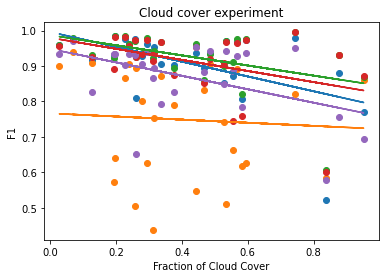

In [23]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x_1 = L8SR_table["cloud cover"] / 100
y_1 = L8SR_table["F1"]
theta1 = np.polyfit(x_1, y_1, 1)
y_line_1 = theta1[1] + theta1[0] * x_1

x_2 = S1_sl_table["cloud cover"] / 100
y_2 = S1_sl_table["F1"]
theta2 = np.polyfit(x_2, y_2, 1)
y_line_2 = theta2[1] + theta2[0] * x_2

x_3 = L8SR_S1A_sl_table["cloud cover"] / 100
y_3 = L8SR_S1A_sl_table["F1"]
theta3 = np.polyfit(x_3, y_3, 1)
y_line_3 = theta3[1] + theta3[0] * x_3


x_4 = L8SR_S1A_sl3_table["cloud cover"] / 100
y_4 = L8SR_S1A_sl3_table["F1"]
theta4 = np.polyfit(x_4, y_4, 1)
y_line_4 = theta4[1] + theta4[0] * x_4


x_5 = ndwi_table["cloud cover"] / 100
y_5 = ndwi_table["F1"]
theta5 = np.polyfit(x_5, y_5, 1)
y_line_5 = theta5[1] + theta5[0] * x_5

# plot lines
plt.scatter(x_1, y_1, label="L8SR")
plt.plot(x_1, y_line_1, label="L8SR")
plt.scatter(x_2, y_2, label="S1_sl")
plt.plot(x_2, y_line_2, label="S1_sl")
plt.scatter(x_3, y_3, label="L8SR+(S1A_sl)")
plt.plot(x_3, y_line_3, label="L8SR+(S1A_sl)")
plt.scatter(x_4, y_4, label="L8SR+S1A+sl")
plt.plot(x_4, y_line_4, label="L8SR+S1A+sl")
plt.scatter(x_5, y_5, label="ndwi")
plt.plot(x_5, y_line_5, label="ndwi")
# plt.legend()

plt.title('Cloud cover experiment')
plt.xlabel('Fraction of Cloud Cover')
plt.ylabel('F1')

plt.show()

In [24]:
print("Average F1 of L8SR: ", sum(y_1) / 28, "gradient: ", theta1[0])
print("Average F1 of S1_sl: ", sum(y_2) / 28, "gradient: ", theta2[0])
print("Average F1 of L8SR + (S1A_sl): ", sum(y_3) / 28, "gradient: ", theta3[0])
print("Average F1 of L8SR + S1A + sl: ", sum(y_4) / 28, "gradient: ", theta4[0])
print("Average F1 of NDWI: ", sum(y_5) / 28, "gradient: ", theta5[0])

Average F1 of L8SR:  0.9088941709892859 gradient:  -0.208996670297265
Average F1 of S1_sl:  0.7481451617607142 gradient:  -0.043967342982411284
Average F1 of L8SR + (S1A_sl):  0.9276501212642856 gradient:  -0.14269985927740378
Average F1 of L8SR + S1A + sl:  0.9146509835428569 gradient:  -0.15643790560915033
Average F1 of NDWI:  0.8692112948250001 gradient:  -0.18956872576216702


## t - test

Please look at r-studio notebook for statistical tests in CloudcoverExp.Rmd and the results is in `results/CloudCoverExp.pdf`